In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display
import stumpy
import os
import zipfile

np.set_printoptions(suppress=True)

data_directory = './data/Feb2022/'

In [13]:
# Unzip all the contents of the data folder

for file in os.listdir(data_directory):

    if "zip" not in file:
        continue
    
    with zipfile.ZipFile(data_directory + file, 'r') as zip_ref:
        zip_ref.extractall(data_directory)
    os.remove(data_directory + file)

In [14]:
def do_matrix_profile(df, m):
    mps, indices = stumpy.mstump(df, m)
    motifs_idx = np.argsort(mps, axis=1)[:, 0]
    nn_idx = indices[np.arange(len(motifs_idx)), motifs_idx]

    fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(18,80))

    for k, dim_name in enumerate(df.columns):
        axs[k].set_ylabel(dim_name, fontsize='8')
        axs[k].plot(np.arange(df.shape[0]), df[dim_name])
        axs[k].set_xlabel('Time', fontsize ='8')

        axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='8')
        axs[k + mps.shape[0]].plot(mps[k], c='orange')
        axs[k + mps.shape[0]].set_xlabel('Time', fontsize ='8')

        axs[k].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
        axs[k].axvline(x=nn_idx[1], linestyle="dashed", c='black')
        axs[k + mps.shape[0]].axvline(x=motifs_idx[1], linestyle="dashed", c='black')
        axs[k + mps.shape[0]].axvline(x=nn_idx[1], linestyle="dashed", c='black')

        if dim_name != 'T3':
            axs[k].plot(range(motifs_idx[k], motifs_idx[k] + m), df[dim_name].iloc[motifs_idx[k] : motifs_idx[k] + m], c='red', linewidth=4)
            axs[k].plot(range(nn_idx[k], nn_idx[k] + m), df[dim_name].iloc[nn_idx[k] : nn_idx[k] + m], c='red', linewidth=4)
            axs[k + mps.shape[0]].plot(motifs_idx[k], mps[k, motifs_idx[k]] + 1, marker="v", markersize=10, color='red')
            axs[k + mps.shape[0]].plot(nn_idx[k], mps[k, nn_idx[k]] + 1, marker="v", markersize=10, color='red')
        else:
            axs[k + mps.shape[0]].plot(motifs_idx[k], mps[k, motifs_idx[k]] + 1, marker="v", markersize=10, color='black')
            axs[k + mps.shape[0]].plot(nn_idx[k], mps[k, nn_idx[k]] + 1, marker="v", markersize=10, color='black')

    plt.show()

In [41]:
def read_in_file(filename, keep_columns=None):
    df = pd.read_csv(filename)

    if "time" in df.columns.tolist():
        df.time = pd.to_datetime(df.time, format='%Y-%m-%dT%H:%M:%S.%f')

    df = df.set_index('time')

    if keep_columns is not None:
        drop_columns = list( set(df.columns.tolist()) - set(keep_columns) )
        df = df.drop(columns=drop_columns)

    return df

In [39]:
def groupby_second(df):
    df = df.groupby(by=[df.index.year, df.index.month, df.index.day, df.index.hour, df.index.minute, df.index.second]).agg('mean')
    df.index = pd.to_datetime(df.index.get_level_values(0).astype(str) + '-' +
                df.index.get_level_values(1).astype(str) + '-' +
                df.index.get_level_values(2).astype(str) + 'T' +
                df.index.get_level_values(3).astype(str) + ':' +
                df.index.get_level_values(4).astype(str) + ':' +
                df.index.get_level_values(5).astype(str),
                format='%Y-%m-%dT%H:%M:%S')
    return df

,Continuous Bond FFT Band 0,Continuous Bond FFT Band 1,Continuous Bond FFT Band 2,Continuous Bond FFT Band 3,Continuous Bond FFT Band 4,Continuous Bond FFT Band 5,Continuous Bond FFT Band 6,Continuous Bond FFT Band 7
time,,,,,,,,
2022-02-14 09:00:00,0.000148,0.000168,0.000206,0.000749,0.000179,0.000166,0.000164,0.000181
2022-02-14 09:00:01,0.000177,0.000204,0.000208,0.000759,0.000144,0.000188,0.000187,0.000168
2022-02-14 09:00:02,0.000166,0.000186,0.000187,0.000708,0.000154,0.000170,0.000178,0.000161
2022-02-14 09:00:03,0.000136,0.000181,0.000169,0.000729,0.000182,0.000171,0.000158,0.000180
2022-02-14 09:00:04,0.000188,0.000198,0.000176,0.000728,0.000188,0.000194,0.000158,0.000182


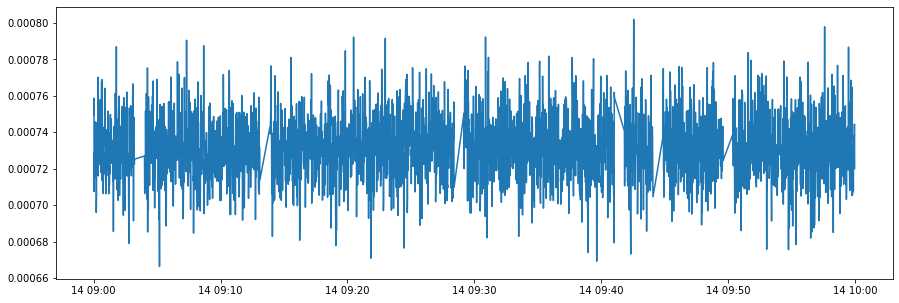

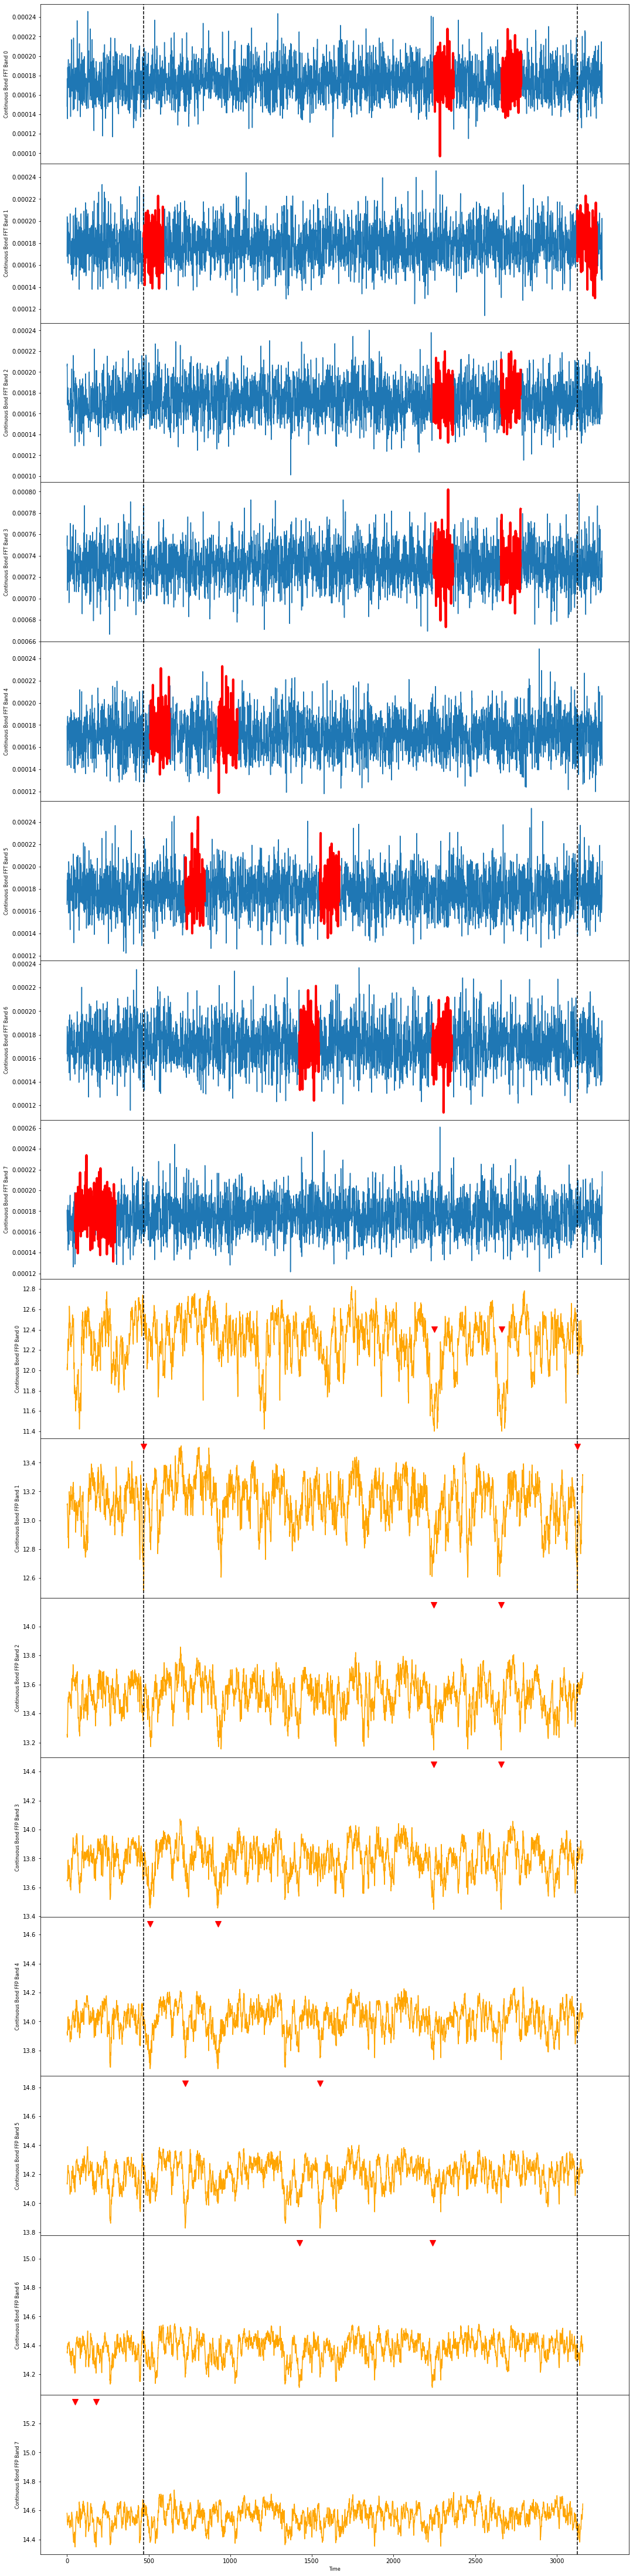

In [45]:
for file in os.listdir(data_directory):
    df = read_in_file(data_directory + file, ['Continuous Bond FFT Band ' + str(i) for i in range(8)])
    # df = read_in_file(data_directory + file)
    # df = df.iloc[1::2]
    df = df.dropna()
    df = groupby_second(df)
    display(df.head(5))

    figure(figsize=(15,5))
    plt.plot(df.index, df['Continuous Bond FFT Band 3'])
    plt.show()

    do_matrix_profile(df, 120)
    break
    